In [ ]:
!pip install vaderSentiment
!pip install panda
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn
!pip install nltk
!pip install contractions
!pip install imbalanced-learn
!pip install statsmodels

In [ ]:
#!pip freeze > requirements.txt

In [ ]:
#!pip install -r "C:\Users\FATISDA\Documents\Hasan\Sekar DKK\requirements.txt"

# Libraries

In [117]:
# Load libraries
import os
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
import itertools

from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV

from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline


# Libraries for Preprocessing

In [118]:
#Import the required libraries for text preprocessing
import re
import string
import contractions
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Hardware Specs

## CPU

In [119]:
!cat /proc/cpuinfo

'cat' is not recognized as an internal or external command,
operable program or batch file.


## Memory

In [120]:
!cat /proc/meminfo

'cat' is not recognized as an internal or external command,
operable program or batch file.


# General Configurations

## Applying Seeding for Fixed Randomization

In [121]:
# Seeding for Fixed Randomization
seed = 42
np.random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

## Path and Hyperparameter Searching Configurations

In [122]:
PERFORM_HYPERPARAM_SEARCH = False
PATH = 'C:\\Users\\FATISDA\\Documents\\Hasan\\Sekar DKK\\CSVs\\'

# Load the Dataset

## Product Names

In [123]:
#load product name
url='https://drive.google.com/file/d/1owdu8mp9bcuNAy1OHgPDVSJ55pXJguMU/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
pname = pd.read_csv(url, usecols=['key', 'name'])
pname.head(10)

,key,name
0,0_bj,Salted Caramel Core
1,1_bj,Netflix & Chilll'd™
2,2_bj,Chip Happens
3,3_bj,Cannoli
4,4_bj,Gimme S’more!™
5,5_bj,Peanut Butter Half Baked®
6,6_bj,Berry Sweet Mascarpone
7,7_bj,Chocolate Peanut Butter Split
8,8_bj,Justice ReMix'd ™
9,9_bj,Boots on the Moooo’n™


## Product Reviews

In [124]:
# Load review dataset
creviews = pd.read_csv('https://raw.githubusercontent.com/khawslee/Sentiment-Analysis-Using-Vader/main/reviews.csv')
creviews

,key,author,date,stars,title,helpful_yes,helpful_no,text
0,0_bj,Ilovebennjerry,2017-04-15,3,Not enough brownies!,10,3,"Super good, don't get me wrong. But I came for..."
1,0_bj,Sweettooth909,2020-01-05,5,I’m OBSESSED with this pint!,3,0,I decided to try it out although I’m not a hug...
2,0_bj,LaTanga71,2018-04-26,3,My favorite...More Caramel Please,5,2,My caramel core begins to disappear about half...
3,0_bj,chicago220,2018-01-14,5,Obsessed!!!,24,1,Why are people complaining about the blonde br...
4,0_bj,Kassidyk,2020-07-24,1,Worst Ice Cream Ever!,1,5,This ice cream is worst ice cream I’ve ever ta...
...,...,...,...,...,...,...,...,...
7938,56_bj,Shellyshellzs,2020-04-30,5,Peanut butter fudge heaven,0,0,Oh man I use to be a whatever was on sale girl...
7939,56_bj,Or1234,2020-02-24,5,The best Chocolate Ice Cream Combo,0,0,This is the first chocolate ice cream I’ve tri...
7940,56_bj,ava21,2020-01-31,5,PERFECT!!,0,0,This is the best pint of ice cream I've ever h...
7941,56_bj,yeee,2019-03-13,5,My favorite!,0,0,This is my favorite ice cream ever! Can't get ...


## Combine the Dataset of Product Name and Review

In [125]:
merged_df = pd.merge(creviews, pname[['key', 'name']], on='key', how='left')
merged_df.rename(columns={'name': 'product_name'}, inplace=True)
cols = merged_df.columns.tolist()
cols.remove('product_name')
cols.insert(cols.index('key') + 1, 'product_name')
merged_df = merged_df.reindex(columns=cols)
merged_df.head(10)

,key,product_name,author,date,stars,title,helpful_yes,helpful_no,text
0,0_bj,Salted Caramel Core,Ilovebennjerry,2017-04-15,3,Not enough brownies!,10,3,"Super good, don't get me wrong. But I came for..."
1,0_bj,Salted Caramel Core,Sweettooth909,2020-01-05,5,I’m OBSESSED with this pint!,3,0,I decided to try it out although I’m not a hug...
2,0_bj,Salted Caramel Core,LaTanga71,2018-04-26,3,My favorite...More Caramel Please,5,2,My caramel core begins to disappear about half...
3,0_bj,Salted Caramel Core,chicago220,2018-01-14,5,Obsessed!!!,24,1,Why are people complaining about the blonde br...
4,0_bj,Salted Caramel Core,Kassidyk,2020-07-24,1,Worst Ice Cream Ever!,1,5,This ice cream is worst ice cream I’ve ever ta...
5,0_bj,Salted Caramel Core,Nikiera,2020-07-23,2,Way Too Salty,3,1,I bought this last night to go with Louisiana ...
6,0_bj,Salted Caramel Core,Mmelvin,2017-05-28,3,"Love this flavor, but...",3,3,"This is definitely my favorite flavor, but rec..."
7,0_bj,Salted Caramel Core,Shay10,2017-07-02,3,Really Wanted To Love This,4,1,"I am not a chocolate person at all, and this w..."
8,0_bj,Salted Caramel Core,caramel4dayz,2017-07-16,2,Could be better.,8,6,"I LOVE caramel, so much so that I could eat it..."
9,0_bj,Salted Caramel Core,RosaT777,2019-02-12,3,Salted Caramel core had NO CARAMEL,1,1,I love all the Ben & Jerry’s flavor. But recen...


# Preprocessing

In [126]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\FATISDA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\FATISDA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\FATISDA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\FATISDA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [127]:
# Get unique values
unique_values = merged_df['stars'].value_counts()
print(unique_values)

stars
5    5844
1     738
4     557
3     407
2     397
Name: count, dtype: int64


In [128]:
# Convert star rating to sentiments
def startosentiment(_star, rating=3):
    rating = 3 # exclude the neutral sentiment (star rating = 3)
    if _star > rating:
        return 1
    elif _star < rating:
        return 0

In [129]:
sia = SentimentIntensityAnalyzer()
# Data cleaning - fill 'title' column with blank if it is N/A
merged_df['title'] = merged_df['title'].fillna('')

# Combine title and text to a new column
merged_df['com_titletext'] = merged_df['title'] + " " + merged_df['text']

# Convert star rating to sentiments
merged_df['b_star'] = merged_df.apply(lambda x: startosentiment(x['stars']), axis=1)

# Convert text to score using Vader and exclude the neutral sentiments (stars = 3)
merged_df['b_score'] = merged_df.apply(lambda x: sia.polarity_scores(x['com_titletext'])['compound'],axis=1)
text_df = merged_df.loc[merged_df['stars'] != 3,['key','product_name','stars','com_titletext','b_star','b_score']]
text_df

,key,product_name,stars,com_titletext,b_star,b_score
1,0_bj,Salted Caramel Core,5,I’m OBSESSED with this pint! I decided to try ...,1.0,0.9442
3,0_bj,Salted Caramel Core,5,Obsessed!!! Why are people complaining about t...,1.0,0.9270
4,0_bj,Salted Caramel Core,1,Worst Ice Cream Ever! This ice cream is worst ...,0.0,-0.7210
5,0_bj,Salted Caramel Core,2,Way Too Salty I bought this last night to go w...,0.0,-0.8834
8,0_bj,Salted Caramel Core,2,"Could be better. I LOVE caramel, so much so th...",0.0,0.9550
...,...,...,...,...,...,...
7938,56_bj,Peanut Butter Fudge Core,5,Peanut butter fudge heaven Oh man I use to be ...,1.0,0.9049
7939,56_bj,Peanut Butter Fudge Core,5,The best Chocolate Ice Cream Combo This is the...,1.0,0.8070
7940,56_bj,Peanut Butter Fudge Core,5,PERFECT!! This is the best pint of ice cream I...,1.0,0.9552
7941,56_bj,Peanut Butter Fudge Core,5,My favorite! This is my favorite ice cream eve...,1.0,0.8350


# Multicollinearity Handling

## Correlation Heatmap

Text(0.5, 1.0, 'Star Rating and Score Heatmap')

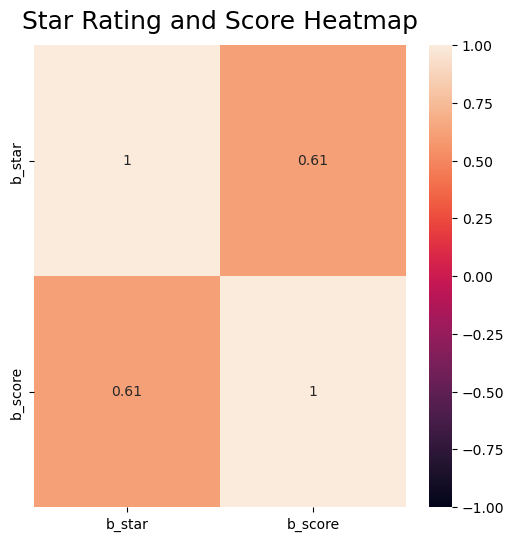

In [130]:
### Plotting the correlation between various columns
plt.figure(figsize = (6, 6))
heatmap = sns.heatmap(text_df[['b_star','b_score']].corr(), vmin = -1, vmax = 1, annot = True)
heatmap.set_title('Star Rating and Score Heatmap', fontdict = {'fontsize' : 18}, pad = 12)

## VIF Measure

In [131]:
# prompt: check the variance inflation factor based on every column from text_df

# Calculate VIF for each independent variable
vif = pd.DataFrame()
vif["Features"] = text_df[['b_star','b_score']].columns
vif["VIF"] = [variance_inflation_factor(text_df[['b_star','b_score']].values, i) for i in range(text_df[['b_star','b_score']].shape[1])]

vif


,Features,VIF
0,b_star,5.102889
1,b_score,5.102889


# Preprocessing

In [132]:
# casefolding
def to_lowercase(text):
  text = text.lower()
  return text

In [133]:
# remove word repetition
def word_repetition(text):
  text = re.sub(r'(.)\1+', r'\1\1', text)
  return text

In [134]:
# remove punctuation repetition
def punct_repetition(text, default_replace=""):
  text = re.sub(r'[\?\.\!]+(?=[\?\.\!])', default_replace, text)
  return text

In [135]:
# fix contractions (e.g. i'm -> i am)
def fix_contractions(text):
  text = contractions.fix(text)
  return text

In [136]:
# set stopwords to english
stop_words = set(stopwords.words('english'))
# set stemmer to english
snowball_stemmer = SnowballStemmer('english')

In [137]:
# tokenize text
def custom_tokenize(text, keep_punct = False, keep_alnum = False, keep_stop = False):
  token_list = word_tokenize(text)

  if not keep_punct:
    token_list = [token for token in token_list
                  if token not in string.punctuation]

  if not keep_alnum:
    token_list = [token for token in token_list if token.isalpha()]

  if not keep_stop:
    stop_words.discard('not')
    token_list = [token for token in token_list if not token in stop_words]

  return token_list

In [138]:
# stemming tokens
def stem_tokens(tokens, stemmer):
  token_list = []
  for token in tokens:
    token_list.append(stemmer.stem(token))
  return token_list

In [139]:
# lemmatize tokens
lemmatizer = WordNetLemmatizer()
def lemmatize_tokens(tokens, word_type, lemmatizer):
  token_list = []
  for token in tokens:
    token_list.append(lemmatizer.lemmatize(token, word_type[token]))
  return token_list

In [140]:
# function to preprocess text
def process_review(text, verbose=False):
  # if verbose: print("Initial tweet: {}".format(review))

  ## Word Features
  text = to_lowercase(text) # lower case
  text = fix_contractions(text) # replace contractions
  text = punct_repetition(text) # replace punctuation repetition
  text = word_repetition(text) # replace word repetition

  # if verbose: print("Post Word processing review: {}".format(text))

  ## Tokenization & Stemming
  tokens = custom_tokenize(text, keep_alnum=False, keep_stop=False) # tokenize
  stem = stem_tokens(tokens, snowball_stemmer) # stem tokens

  return stem

In [141]:
# apply text preprocessing to the review text
text_df['tokens_titletext'] = text_df['com_titletext'].apply(process_review)
text_df

,key,product_name,stars,com_titletext,b_star,b_score,tokens_titletext
1,0_bj,Salted Caramel Core,5,I’m OBSESSED with this pint! I decided to try ...,1.0,0.9442,"[obsess, pint, decid, tri, although, not, huge..."
3,0_bj,Salted Caramel Core,5,Obsessed!!! Why are people complaining about t...,1.0,0.9270,"[obsess, peopl, complain, blond, browni, not, ..."
4,0_bj,Salted Caramel Core,1,Worst Ice Cream Ever! This ice cream is worst ...,0.0,-0.7210,"[worst, ice, cream, ever, ice, cream, worst, i..."
5,0_bj,Salted Caramel Core,2,Way Too Salty I bought this last night to go w...,0.0,-0.8834,"[way, salti, bought, last, night, go, louisian..."
8,0_bj,Salted Caramel Core,2,"Could be better. I LOVE caramel, so much so th...",0.0,0.9550,"[could, better, love, caramel, much, could, ea..."
...,...,...,...,...,...,...,...
7938,56_bj,Peanut Butter Fudge Core,5,Peanut butter fudge heaven Oh man I use to be ...,1.0,0.9049,"[peanut, butter, fudg, heaven, oh, man, use, w..."
7939,56_bj,Peanut Butter Fudge Core,5,The best Chocolate Ice Cream Combo This is the...,1.0,0.8070,"[best, chocol, ice, cream, combo, first, choco..."
7940,56_bj,Peanut Butter Fudge Core,5,PERFECT!! This is the best pint of ice cream I...,1.0,0.9552,"[perfect, best, pint, ice, cream, ever, like, ..."
7941,56_bj,Peanut Butter Fudge Core,5,My favorite! This is my favorite ice cream eve...,1.0,0.8350,"[favorit, favorit, ice, cream, ever, not, get,..."


In [142]:
print(text_df['b_star'].value_counts())

b_star
1.0    6401
0.0    1135
Name: count, dtype: int64


# Split Data

In [143]:
X = text_df["tokens_titletext"].tolist()
y = text_df["b_star"].tolist()

In [144]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, train_size=0.80) #X_train, y_train
TRAIN_SIZE = 0.8
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=(1-TRAIN_SIZE), random_state=seed)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=seed)

# TF-IDF

In [145]:
# function to fit tfidf vectorizer
def fit_tfidf(review_corpus):
  tf_vect = TfidfVectorizer(preprocessor=lambda x: x,
                            tokenizer=lambda x: x)
  tf_vect.fit(review_corpus)
  return tf_vect

In [146]:
tf = fit_tfidf(X_train)
X_train_tf = tf.transform(X_train)
X_val_tf = tf.transform(X_val)
X_test_tf = tf.transform(X_test)

c:\Users\FATISDA\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


# Confusion Matrix

In [147]:
def plot_confusion(cm):
  plt.figure(figsize = (5,5))
  x_axis_labels = ['neg','pos'] # labels for x-axis
  y_axis_labels = ['neg','pos'] # labels for y-axis
  sns.heatmap(cm, annot=True, cmap="Blues", fmt='.0f', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
  plt.xlabel("Prediction")
  plt.ylabel("True value")
  plt.title("Confusion Matrix")
  return sns

In [148]:
## https://github.com/parthpatwa/covid19-fake-news-detection/blob/main/ml_baseline-test.ipynb
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(5, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True Label')
    #plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.xlabel('Predicted Label')
    plt.show()

# Methods for Training, Validation, and Testing

## Model Building for Training and Validation

In [149]:
def train_val_baseline(pipeline, 
                       method_title, 
                       Xtrain=X_train_tf,
                       Ytrain=y_train,
                       Xval=X_val_tf,
                       Yval=y_val):
  print(f'Training and Validation of {method_title}')

  # get the starting time
  t0 = time.time()

  # fit the model with the data
  model = pipeline.fit(Xtrain, Ytrain)

  pred=model.predict(Xval)
  print(f'Time: {time.time() - t0} \nPerformance score:\n')
  print(f"{method_title} Model Accuracy: {accuracy_score(Yval, pred)}")

  # display the elapsed time and performance scores
  print(classification_report(y_val, pred, digits=3))
  plot_confusion_matrix(confusion_matrix(y_val, pred),
                        target_names=['Neg','Pos'],
                        normalize = False,
                        title = f'Confusion matix of {method_title} on val data')
  return model


In [150]:
def test_baseline(model, method_title,
                  Xtest=X_test_tf,
                  Ytest=y_test):
  print(f'Testing Baseline of {method_title}')

  # get the starting time
  t0 = time.time()
  pred=model.predict(Xtest)
  
  # display the elapsed time and performance scores
  print(f'Time: {time.time() - t0}')

  print(f"{method_title} Model Accuracy: {accuracy_score(Ytest, pred)} \nPerformance score:")

  print(classification_report(Ytest, pred, digits=3))
  plot_confusion_matrix(confusion_matrix(Ytest, pred),
                        target_names=['Neg','Pos'],
                        normalize = False,
                        title = f'Confusion matix of {method_title} on Test data')


# Selecting the Most Appropriate Hyperparameters

In [151]:
def hyper_param_search(pipeline,
                       parameter,
                       file_name,
                       cv_range = range(5,11),
                       Xtrain=X_train_tf,
                       Ytrain=y_train,
                       Xval=X_val_tf,
                       Yval=y_val):
  performance_array = []
  # Perform the grid search
  for i in cv_range:
      grid_search = GridSearchCV(pipeline, parameter, cv=i, verbose=1)
      t0 = time.time()
      grid_search.fit(Xtrain, Ytrain)
      gs_time = time.time() - t0

      # Display the best parameters, its testing score, and validation score
      gs_best_param = grid_search.best_params_
      gs_best_score = grid_search.best_score_
      gs_val_score = grid_search.score(Xval, Yval)

      # Print the best parameters and score for each cross-validation value
      print("Cross-validation value: ", i)
      print("Best parameters: ", gs_best_param)
      print("Best Train score: ", gs_best_score)
      print('Validation Score:', gs_val_score)
      print('Runtime:', gs_time)

      # Populate the parameters, scores, and running time for later table
      performance_array.append([i, gs_best_param,
                                gs_best_score,
                                gs_val_score,
                                gs_time])

  # convert the previously collected performance array into Panda DataFrame
  # and arrange the columns
  data_df = pd.DataFrame(performance_array, columns=['k', 'best_param',
                                                     'best_score', 'val_score',
                                                     'time'])

  # Write the DataFrame to a CSV file
  data_df.to_csv(PATH + file_name, index=False)

# Transforms The Tokenized Title Text into TF Token

In [152]:
token_text = text_df['tokens_titletext']
tf_token = tf.transform(token_text)


# 1. Before Balancing

## 1.1. Naive Bayes Before Balancing

### 1.1.1 Hyperparameter Search and Cross Validation

In [153]:
if PERFORM_HYPERPARAM_SEARCH:
    pipeline = Pipeline([
        ('tfidf', TfidfTransformer()),
        ('mnb', MultinomialNB())
    ])

    # Define the parameters to be tuned
    parameters = {
        'mnb__alpha': [100, 10, 1.0, 0.1, 0.01]#,
    }

    # Perform hyperparameter search
    hyper_param_search(pipeline, parameters, 'MNB_HYPERPARAM.csv')

### 1.1.2 Display the Performance Metrics and Confusion Matrix of Validation Step

Training and Validation of MNB
Time: 0.0 
Performance score:

MNB Model Accuracy: 0.9270557029177718
              precision    recall  f1-score   support

         0.0      0.915     0.519     0.663       104
         1.0      0.928     0.992     0.959       650

    accuracy                          0.927       754
   macro avg      0.922     0.756     0.811       754
weighted avg      0.926     0.927     0.918       754



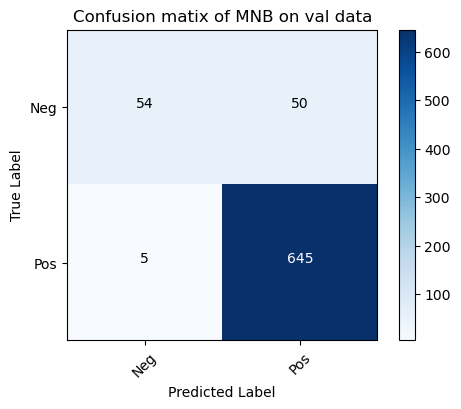

In [154]:
pipeline = Pipeline([
    ('tfidf', TfidfTransformer()),
    ('mnb', MultinomialNB(alpha=0.1))
])

mnb_model = train_val_baseline(pipeline, 'MNB')

### 1.1.3 Display the Performance Metrics and Confusion Matrix of Testing Step

Testing Baseline of MNB
Time: 0.0
MNB Model Accuracy: 0.9190981432360743 
Performance score:
              precision    recall  f1-score   support

         0.0      0.883     0.495     0.635       107
         1.0      0.922     0.989     0.955       647

    accuracy                          0.919       754
   macro avg      0.903     0.742     0.795       754
weighted avg      0.917     0.919     0.909       754



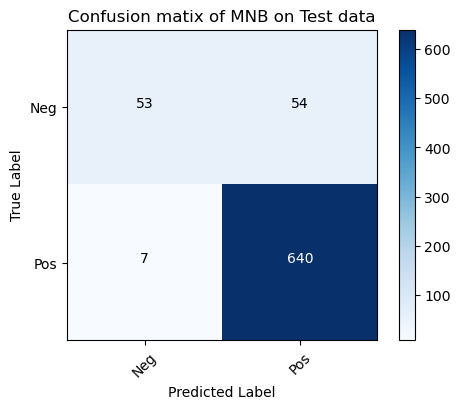

In [155]:
test_baseline(mnb_model, 'MNB')


### 1.1.4 Map The Prediction Labels to Class Labels

In [156]:
nb_predictions = mnb_model.predict(tf_token)

# Mapping prediction labels to class labels ("pos" and "neg")
label_map = {1: "pos", 0: "neg"}
nb_predicted_labels = [label_map[prediction] for prediction in nb_predictions]

# Adding the prediction column to the DataFrame
text_df['nb_pred'] = nb_predicted_labels

# Displaying the DataFrame with the prediction column
text_df


,key,product_name,stars,com_titletext,b_star,b_score,tokens_titletext,nb_pred
1,0_bj,Salted Caramel Core,5,I’m OBSESSED with this pint! I decided to try ...,1.0,0.9442,"[obsess, pint, decid, tri, although, not, huge...",pos
3,0_bj,Salted Caramel Core,5,Obsessed!!! Why are people complaining about t...,1.0,0.9270,"[obsess, peopl, complain, blond, browni, not, ...",pos
4,0_bj,Salted Caramel Core,1,Worst Ice Cream Ever! This ice cream is worst ...,0.0,-0.7210,"[worst, ice, cream, ever, ice, cream, worst, i...",neg
5,0_bj,Salted Caramel Core,2,Way Too Salty I bought this last night to go w...,0.0,-0.8834,"[way, salti, bought, last, night, go, louisian...",neg
8,0_bj,Salted Caramel Core,2,"Could be better. I LOVE caramel, so much so th...",0.0,0.9550,"[could, better, love, caramel, much, could, ea...",pos
...,...,...,...,...,...,...,...,...
7938,56_bj,Peanut Butter Fudge Core,5,Peanut butter fudge heaven Oh man I use to be ...,1.0,0.9049,"[peanut, butter, fudg, heaven, oh, man, use, w...",pos
7939,56_bj,Peanut Butter Fudge Core,5,The best Chocolate Ice Cream Combo This is the...,1.0,0.8070,"[best, chocol, ice, cream, combo, first, choco...",pos
7940,56_bj,Peanut Butter Fudge Core,5,PERFECT!! This is the best pint of ice cream I...,1.0,0.9552,"[perfect, best, pint, ice, cream, ever, like, ...",pos
7941,56_bj,Peanut Butter Fudge Core,5,My favorite! This is my favorite ice cream eve...,1.0,0.8350,"[favorit, favorit, ice, cream, ever, not, get,...",pos


In [157]:
text_df['nb_pred'].value_counts()

nb_pred
pos    6668
neg     868
Name: count, dtype: int64

### 1.1.5 Display the Class Sentiment in Bar and Pie Charts

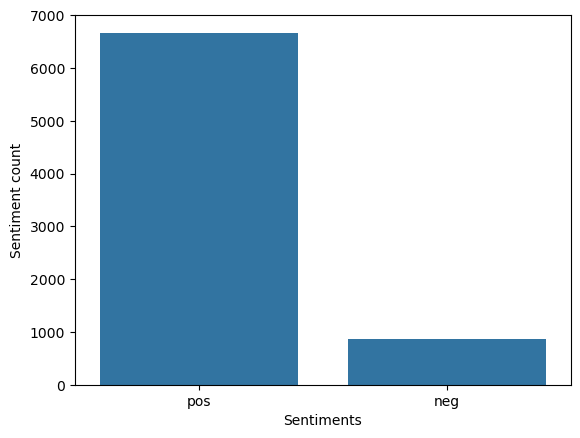

In [158]:
text_df_sorted = text_df.sort_values('nb_pred', ascending=False)
ax = sns.countplot(x ='nb_pred', data = text_df_sorted)
ax.set(ylabel='Sentiment count', xlabel='Sentiments')
plt.show()

Text(0.5, 1.0, 'Sentiment distribution Naive Bayes Pie Chart')

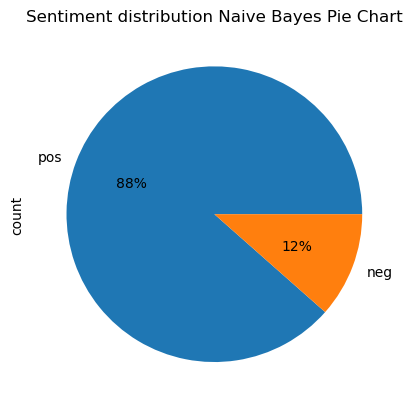

In [159]:
text_df_sorted['nb_pred'].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Sentiment distribution Naive Bayes Pie Chart")

### 1.1.6 Display The Sentiment based on Brands

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice cream brand')]

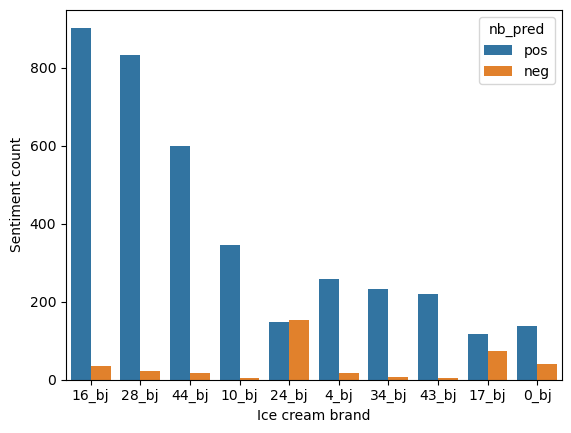

In [160]:
# Top 10 ice cream brand sort by number of reviews
df_prod_reviewcount = text_df_sorted['key'].value_counts().head(10)
df_prod_isin = text_df_sorted[text_df_sorted['key'].isin(df_prod_reviewcount.index)]
ax1 = sns.countplot(x='key', hue='nb_pred', data=df_prod_isin, order=df_prod_reviewcount.index)
ax1.set(ylabel='Sentiment count', xlabel='Ice cream brand')

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice Cream brand')]

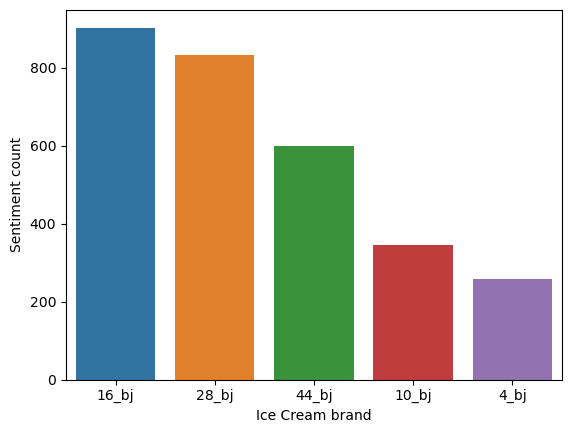

In [161]:
# Top 5 ice cream brand sort by positive review
df_posreview = text_df_sorted.loc[text_df_sorted['nb_pred'] == 'pos']
df_prod_positivecount = df_posreview['key'].value_counts().head(5).reset_index(name='count')
ax2 = sns.barplot(x='key', y='count', data=df_prod_positivecount, hue='key')
ax2.set(ylabel='Sentiment count', xlabel='Ice Cream brand')

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice Cream brand')]

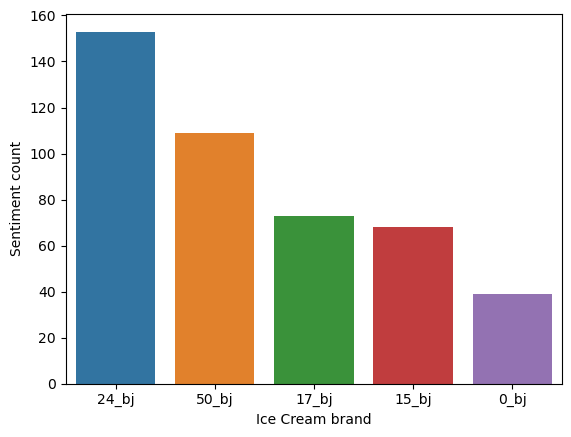

In [162]:
# Top 5 ice cream brand sort by negative review
df_negreview = text_df_sorted.loc[text_df_sorted['nb_pred'] == 'neg']
df_prod_negativecount = df_negreview['key'].value_counts().head(5).reset_index(name='count')
ax2 = sns.barplot(x='key', y='count', data=df_prod_negativecount, hue='key')
ax2.set(ylabel='Sentiment count', xlabel='Ice Cream brand')

## 1.2. Logistic Regression

### 1.2.1 Hyperparameter Search and Cross Validation

In [163]:
if PERFORM_HYPERPARAM_SEARCH:
    pipeline = Pipeline([
        ('tfidf', TfidfTransformer()),
        ('lr', LogisticRegression(random_state=seed))
    ])

    # Define the parameters to be tuned
    parameters = {
        'lr__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
        'lr__tol': [0.0001, 0.001, 0.01, 0.1, 1.0]
    }

    # Perform hyperparameter search
    hyper_param_search(pipeline, parameters, 'LR_HYPERPARAM.csv')

### 1.2.2 Display the Performance Metrics and Confusion Matrix of Validation Step

Training and Validation of LR
Time: 0.00930333137512207 
Performance score:

LR Model Accuracy: 0.9456233421750663
              precision    recall  f1-score   support

         0.0      0.920     0.663     0.771       104
         1.0      0.948     0.991     0.969       650

    accuracy                          0.946       754
   macro avg      0.934     0.827     0.870       754
weighted avg      0.945     0.946     0.942       754



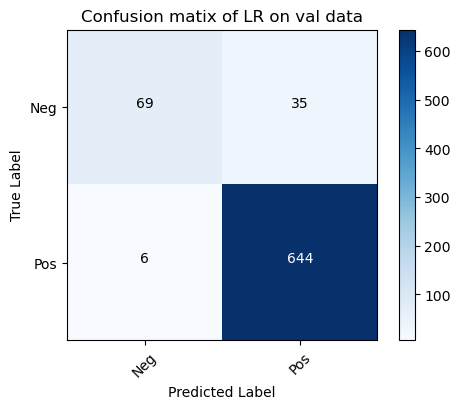

In [164]:
pipeline = Pipeline([
    ('tfidf', TfidfTransformer()),
    ('lr', LogisticRegression(random_state=seed, 
                              solver='saga', 
                              tol=1.0))
])

lr_model = train_val_baseline(pipeline, 'LR')

### 1.2.3 Display the Performance Metrics and Confusion Matrix of Testing Step

Testing Baseline of LR
Time: 0.0
LR Model Accuracy: 0.9376657824933687 
Performance score:
              precision    recall  f1-score   support

         0.0      0.905     0.626     0.740       107
         1.0      0.941     0.989     0.965       647

    accuracy                          0.938       754
   macro avg      0.923     0.808     0.852       754
weighted avg      0.936     0.938     0.933       754



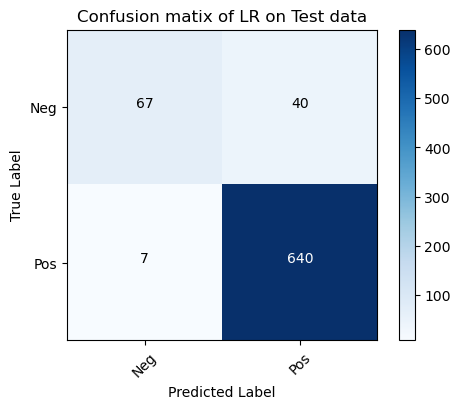

In [165]:
test_baseline(lr_model, 'LR')

### 1.2.4 Map The Prediction Labels to Class Labels

In [166]:
lr_predictions = lr_model.predict(tf_token)

# Mapping prediction labels to class labels ("pos" and "neg")
label_map = {1: "pos", 0: "neg"}
lr_predicted_labels = [label_map[prediction] for prediction in lr_predictions]

# Adding the prediction column to the DataFrame
text_df['lr_pred'] = lr_predicted_labels

# Displaying the DataFrame with the prediction column
text_df


,key,product_name,stars,com_titletext,b_star,b_score,tokens_titletext,nb_pred,lr_pred
1,0_bj,Salted Caramel Core,5,I’m OBSESSED with this pint! I decided to try ...,1.0,0.9442,"[obsess, pint, decid, tri, although, not, huge...",pos,pos
3,0_bj,Salted Caramel Core,5,Obsessed!!! Why are people complaining about t...,1.0,0.9270,"[obsess, peopl, complain, blond, browni, not, ...",pos,pos
4,0_bj,Salted Caramel Core,1,Worst Ice Cream Ever! This ice cream is worst ...,0.0,-0.7210,"[worst, ice, cream, ever, ice, cream, worst, i...",neg,neg
5,0_bj,Salted Caramel Core,2,Way Too Salty I bought this last night to go w...,0.0,-0.8834,"[way, salti, bought, last, night, go, louisian...",neg,neg
8,0_bj,Salted Caramel Core,2,"Could be better. I LOVE caramel, so much so th...",0.0,0.9550,"[could, better, love, caramel, much, could, ea...",pos,neg
...,...,...,...,...,...,...,...,...,...
7938,56_bj,Peanut Butter Fudge Core,5,Peanut butter fudge heaven Oh man I use to be ...,1.0,0.9049,"[peanut, butter, fudg, heaven, oh, man, use, w...",pos,pos
7939,56_bj,Peanut Butter Fudge Core,5,The best Chocolate Ice Cream Combo This is the...,1.0,0.8070,"[best, chocol, ice, cream, combo, first, choco...",pos,pos
7940,56_bj,Peanut Butter Fudge Core,5,PERFECT!! This is the best pint of ice cream I...,1.0,0.9552,"[perfect, best, pint, ice, cream, ever, like, ...",pos,pos
7941,56_bj,Peanut Butter Fudge Core,5,My favorite! This is my favorite ice cream eve...,1.0,0.8350,"[favorit, favorit, ice, cream, ever, not, get,...",pos,pos


In [167]:
text_df['lr_pred'].value_counts()

lr_pred
pos    6678
neg     858
Name: count, dtype: int64

### 1.2.5 Display the Class Sentiment in Bar and Pie Charts

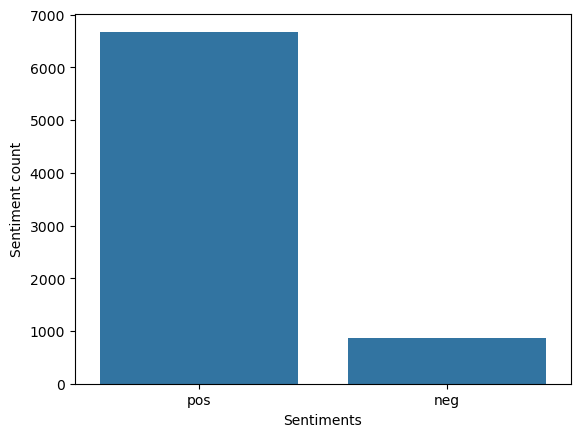

In [168]:
text_df_sorted = text_df.sort_values('lr_pred', ascending=False)
ax = sns.countplot(x ='lr_pred', data = text_df_sorted)
ax.set(ylabel='Sentiment count', xlabel='Sentiments')
plt.show()

Text(0.5, 1.0, 'Sentiment distribution Logistic Regression Pie Chart')

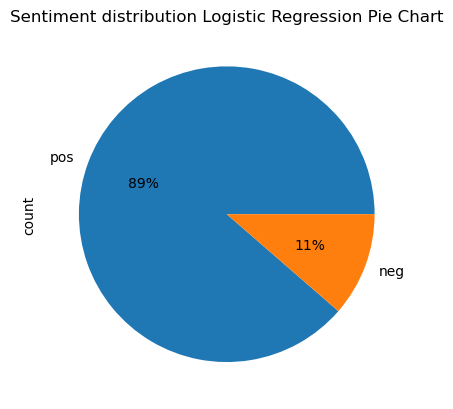

In [169]:
text_df_sorted['lr_pred'].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Sentiment distribution Logistic Regression Pie Chart")

### 1.2.6 Display The Sentiment based on Brands

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice cream brand')]

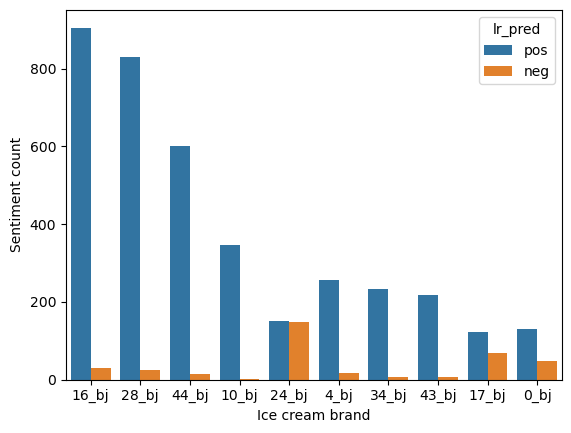

In [170]:
# Top 10 ice cream brand sort by number of reviews
df_prod_reviewcount = text_df_sorted['key'].value_counts().head(10)
df_prod_isin = text_df_sorted[text_df_sorted['key'].isin(df_prod_reviewcount.index)]
ax1 = sns.countplot(x='key', hue='lr_pred', data=df_prod_isin, order=df_prod_reviewcount.index)
ax1.set(ylabel='Sentiment count', xlabel='Ice cream brand')

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice Cream brand')]

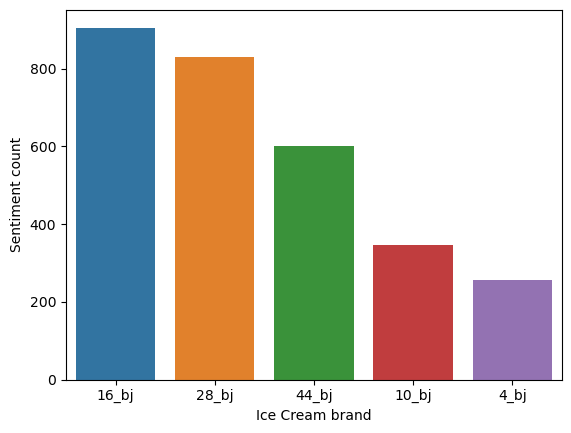

In [171]:
# Top 5 ice cream brand sort by positive review
df_posreview = text_df_sorted.loc[text_df_sorted['lr_pred'] == 'pos']
df_prod_positivecount = df_posreview['key'].value_counts().head(5).reset_index(name='count')
ax2 = sns.barplot(x='key', y='count', data=df_prod_positivecount, hue='key')
ax2.set(ylabel='Sentiment count', xlabel='Ice Cream brand')

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice Cream brand')]

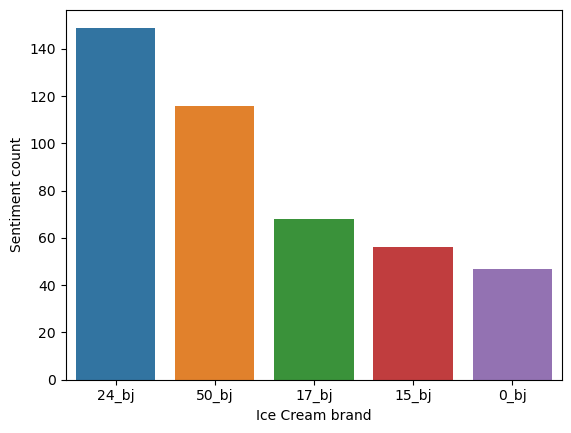

In [172]:
# Top 5 ice cream brand sort by negative review
df_negreview = text_df_sorted.loc[text_df_sorted['lr_pred'] == 'neg']
df_prod_negativecount = df_negreview['key'].value_counts().head(5).reset_index(name='count')
ax2 = sns.barplot(x='key', y='count', data=df_prod_negativecount, hue='key')
ax2.set(ylabel='Sentiment count', xlabel='Ice Cream brand')

## 1.3. Support Vector Machine

### 1.3.1 Hyperparameter Search and Cross Validation

In [173]:
if PERFORM_HYPERPARAM_SEARCH:
    pipeline = Pipeline([
        ('tfidf', TfidfTransformer()),
        ('svm', SVC(random_state=seed, kernel='linear'))
    ])

    # Define the parameters to be tuned
    parameters = {
        'svm__C': [100, 10, 1, 0.1, 0.001]
    }

    # Perform hyperparameter search
    hyper_param_search(pipeline, parameters, 'SVM_HYPERPARAM.csv')

### 1.3.2 Display the Performance Metrics and Confusion Matrix of Validation Step

Training and Validation of SVM
Time: 1.450613260269165 
Performance score:

SVM Model Accuracy: 0.9602122015915119
              precision    recall  f1-score   support

         0.0      0.930     0.769     0.842       104
         1.0      0.964     0.991     0.977       650

    accuracy                          0.960       754
   macro avg      0.947     0.880     0.910       754
weighted avg      0.959     0.960     0.959       754



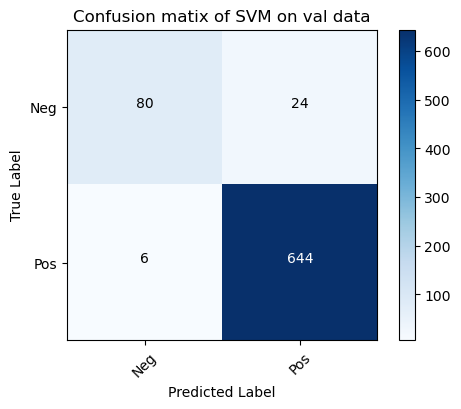

In [174]:
pipeline = Pipeline([
    ('tfidf', TfidfTransformer()),
    ('svm', SVC(C=1,
                kernel='linear', 
                random_state=seed))
])

svm_model = train_val_baseline(pipeline, 'SVM')

### 1.3.3 Display the Performance Metrics and Confusion Matrix of Testing Step

Testing Baseline of SVM
Time: 0.14101314544677734
SVM Model Accuracy: 0.9509283819628647 
Performance score:
              precision    recall  f1-score   support

         0.0      0.907     0.729     0.808       107
         1.0      0.957     0.988     0.972       647

    accuracy                          0.951       754
   macro avg      0.932     0.858     0.890       754
weighted avg      0.950     0.951     0.949       754



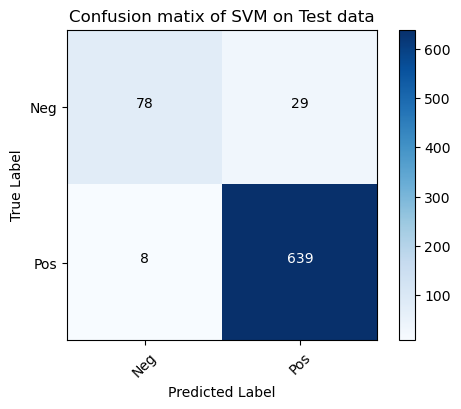

In [175]:
test_baseline(svm_model, 'SVM')

### 1.3.4 Map The Prediction Labels to Class Labels

In [176]:
svm_predictions = svm_model.predict(tf_token)

# Mapping prediction labels to class labels ("pos" and "neg")
label_map = {1: "pos", 0: "neg"}
svm_predicted_labels = [label_map[prediction] for prediction in svm_predictions]

# Adding the prediction column to the DataFrame
text_df['svm_pred'] = svm_predicted_labels

# Displaying the DataFrame with the prediction column
text_df


,key,product_name,stars,com_titletext,b_star,b_score,tokens_titletext,nb_pred,lr_pred,svm_pred
1,0_bj,Salted Caramel Core,5,I’m OBSESSED with this pint! I decided to try ...,1.0,0.9442,"[obsess, pint, decid, tri, although, not, huge...",pos,pos,pos
3,0_bj,Salted Caramel Core,5,Obsessed!!! Why are people complaining about t...,1.0,0.9270,"[obsess, peopl, complain, blond, browni, not, ...",pos,pos,pos
4,0_bj,Salted Caramel Core,1,Worst Ice Cream Ever! This ice cream is worst ...,0.0,-0.7210,"[worst, ice, cream, ever, ice, cream, worst, i...",neg,neg,neg
5,0_bj,Salted Caramel Core,2,Way Too Salty I bought this last night to go w...,0.0,-0.8834,"[way, salti, bought, last, night, go, louisian...",neg,neg,neg
8,0_bj,Salted Caramel Core,2,"Could be better. I LOVE caramel, so much so th...",0.0,0.9550,"[could, better, love, caramel, much, could, ea...",pos,neg,pos
...,...,...,...,...,...,...,...,...,...,...
7938,56_bj,Peanut Butter Fudge Core,5,Peanut butter fudge heaven Oh man I use to be ...,1.0,0.9049,"[peanut, butter, fudg, heaven, oh, man, use, w...",pos,pos,pos
7939,56_bj,Peanut Butter Fudge Core,5,The best Chocolate Ice Cream Combo This is the...,1.0,0.8070,"[best, chocol, ice, cream, combo, first, choco...",pos,pos,pos
7940,56_bj,Peanut Butter Fudge Core,5,PERFECT!! This is the best pint of ice cream I...,1.0,0.9552,"[perfect, best, pint, ice, cream, ever, like, ...",pos,pos,pos
7941,56_bj,Peanut Butter Fudge Core,5,My favorite! This is my favorite ice cream eve...,1.0,0.8350,"[favorit, favorit, ice, cream, ever, not, get,...",pos,pos,pos


In [177]:
text_df['svm_pred'].value_counts()

svm_pred
pos    6509
neg    1027
Name: count, dtype: int64

### 1.3.5 Display the Class Sentiment in Bar and Pie Charts

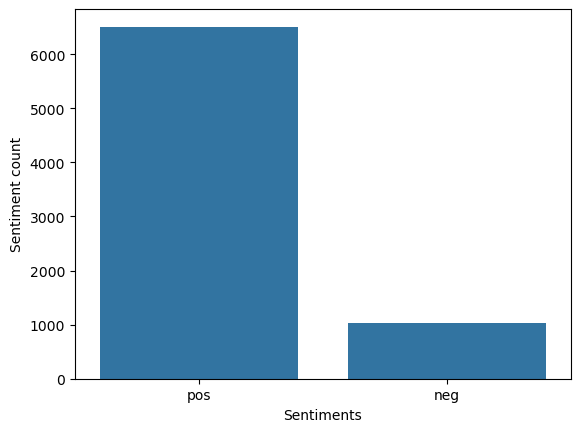

In [178]:
text_df_sorted = text_df.sort_values('svm_pred', ascending=False)
ax = sns.countplot(x ='svm_pred', data = text_df_sorted)
ax.set(ylabel='Sentiment count', xlabel='Sentiments')
plt.show()

Text(0.5, 1.0, 'Sentiment distribution SVM Pie Chart')

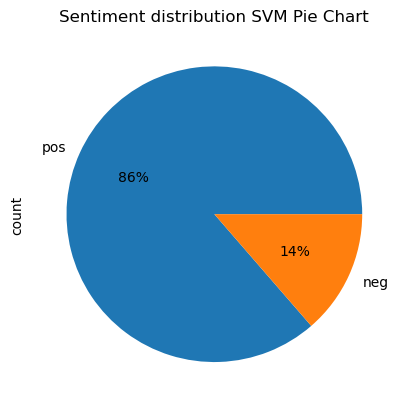

In [179]:
text_df_sorted['svm_pred'].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Sentiment distribution SVM Pie Chart")

### 1.3.6 Display The Sentiment based on Brands

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice cream brand')]

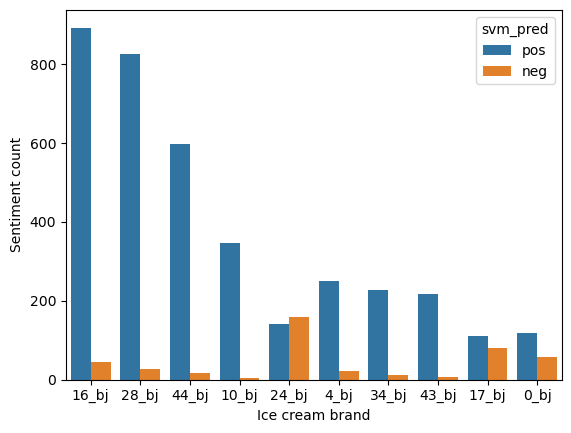

In [180]:
# Top 10 ice cream brand sort by number of reviews
df_prod_reviewcount = text_df_sorted['key'].value_counts().head(10)
df_prod_isin = text_df_sorted[text_df_sorted['key'].isin(df_prod_reviewcount.index)]
ax1 = sns.countplot(x='key', hue='svm_pred', data=df_prod_isin, order=df_prod_reviewcount.index)
ax1.set(ylabel='Sentiment count', xlabel='Ice cream brand')

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice Cream brand')]

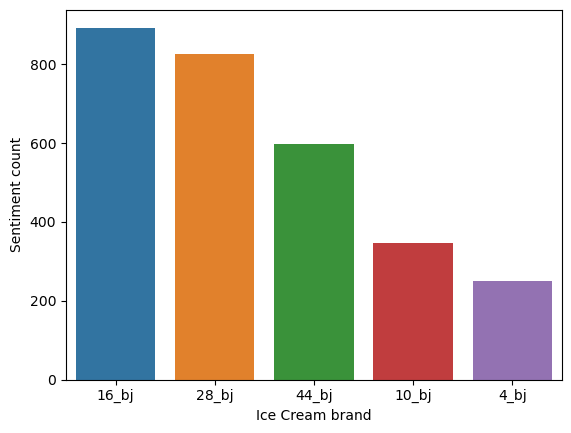

In [181]:
# Top 5 ice cream brand sort by positive review
df_posreview = text_df_sorted.loc[text_df_sorted['svm_pred'] == 'pos']
df_prod_positivecount = df_posreview['key'].value_counts().head(5).reset_index(name='count')
ax2 = sns.barplot(x='key', y='count', data=df_prod_positivecount, hue='key')
ax2.set(ylabel='Sentiment count', xlabel='Ice Cream brand')

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice Cream brand')]

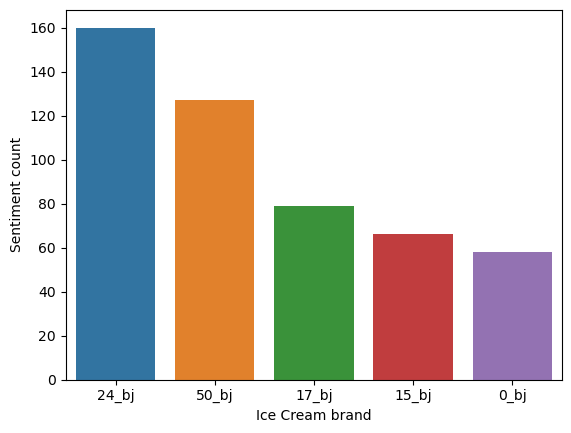

In [182]:
# Top 5 ice cream brand sort by negative review
df_negreview = text_df_sorted.loc[text_df_sorted['svm_pred'] == 'neg']
df_prod_negativecount = df_negreview['key'].value_counts().head(5).reset_index(name='count')
ax2 = sns.barplot(x='key', y='count', data=df_prod_negativecount, hue='key')
ax2.set(ylabel='Sentiment count', xlabel='Ice Cream brand')

# 2. After Balancing

## 2.1. Naive Bayes Before Balancing

### 2.1.1 Hyperparameter Search and Cross Validation

In [186]:
if PERFORM_HYPERPARAM_SEARCH:
    pipeline = Pipeline([
        ('tfidf', TfidfTransformer()),
        ('sampling', SMOTE(random_state=seed)),
        ('mnb', MultinomialNB())
    ])

    # Define the parameters to be tuned
    parameters = {
        'mnb__alpha': [100, 10, 1.0, 0.1, 0.01],
        'sampling__k_neighbors': np.arange(1, 101).tolist()
    }

    # Perform hyperparameter search
    hyper_param_search(pipeline=pipeline, parameter=parameters, file_name='MNB_SMOTE_HYPERPARAM.csv')


### 2.1.2 Display the Performance Metrics and Confusion Matrix of Validation Step

Training and Validation of MNB SMOTE
Time: 0.10117292404174805 
Performance score:

MNB SMOTE Model Accuracy: 0.9310344827586207
              precision    recall  f1-score   support

         0.0      0.691     0.904     0.783       104
         1.0      0.984     0.935     0.959       650

    accuracy                          0.931       754
   macro avg      0.837     0.920     0.871       754
weighted avg      0.943     0.931     0.935       754



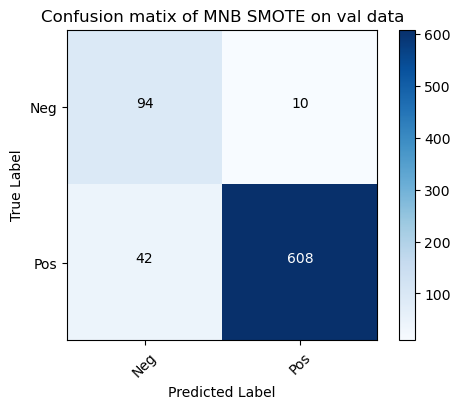

In [187]:
pipeline = Pipeline([
    ('tfidf', TfidfTransformer()),
    ('sampling', SMOTE(random_state=seed, k_neighbors=90)),
    ('mnb', MultinomialNB(alpha=1.0))
])

mnb_smote_model = train_val_baseline(pipeline, 'MNB SMOTE')


### 2.1.3 Display the Performance Metrics and Confusion Matrix of Testing Step

Testing Baseline of MNB SMOTE
Time: 0.0028281211853027344
MNB SMOTE Model Accuracy: 0.9204244031830239 
Performance score:
              precision    recall  f1-score   support

         0.0      0.667     0.879     0.758       107
         1.0      0.979     0.927     0.952       647

    accuracy                          0.920       754
   macro avg      0.823     0.903     0.855       754
weighted avg      0.934     0.920     0.925       754



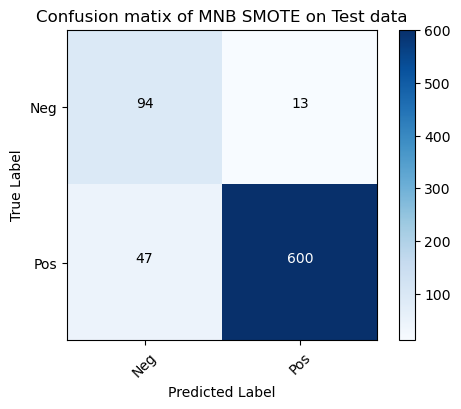

In [188]:
test_baseline(mnb_smote_model, 'MNB SMOTE')


### 2.1.4 Map The Prediction Labels to Class Labels

In [189]:
mnb_smote_predictions = mnb_smote_model.predict(tf_token)

# Mapping prediction labels to class labels ("pos" and "neg")
label_map = {1: "pos", 0: "neg"}
mnb_smote_predicted_labels = [label_map[prediction] for prediction in mnb_smote_predictions]

# Adding the prediction column to the DataFrame
text_df['nb_pred_b'] = mnb_smote_predicted_labels

# Displaying the DataFrame with the prediction column
text_df


,key,product_name,stars,com_titletext,b_star,b_score,tokens_titletext,nb_pred,lr_pred,svm_pred,nb_pred_b
1,0_bj,Salted Caramel Core,5,I’m OBSESSED with this pint! I decided to try ...,1.0,0.9442,"[obsess, pint, decid, tri, although, not, huge...",pos,pos,pos,neg
3,0_bj,Salted Caramel Core,5,Obsessed!!! Why are people complaining about t...,1.0,0.9270,"[obsess, peopl, complain, blond, browni, not, ...",pos,pos,pos,pos
4,0_bj,Salted Caramel Core,1,Worst Ice Cream Ever! This ice cream is worst ...,0.0,-0.7210,"[worst, ice, cream, ever, ice, cream, worst, i...",neg,neg,neg,neg
5,0_bj,Salted Caramel Core,2,Way Too Salty I bought this last night to go w...,0.0,-0.8834,"[way, salti, bought, last, night, go, louisian...",neg,neg,neg,neg
8,0_bj,Salted Caramel Core,2,"Could be better. I LOVE caramel, so much so th...",0.0,0.9550,"[could, better, love, caramel, much, could, ea...",pos,neg,pos,neg
...,...,...,...,...,...,...,...,...,...,...,...
7938,56_bj,Peanut Butter Fudge Core,5,Peanut butter fudge heaven Oh man I use to be ...,1.0,0.9049,"[peanut, butter, fudg, heaven, oh, man, use, w...",pos,pos,pos,pos
7939,56_bj,Peanut Butter Fudge Core,5,The best Chocolate Ice Cream Combo This is the...,1.0,0.8070,"[best, chocol, ice, cream, combo, first, choco...",pos,pos,pos,pos
7940,56_bj,Peanut Butter Fudge Core,5,PERFECT!! This is the best pint of ice cream I...,1.0,0.9552,"[perfect, best, pint, ice, cream, ever, like, ...",pos,pos,pos,pos
7941,56_bj,Peanut Butter Fudge Core,5,My favorite! This is my favorite ice cream eve...,1.0,0.8350,"[favorit, favorit, ice, cream, ever, not, get,...",pos,pos,pos,pos


In [190]:
text_df['nb_pred_b'].value_counts()

nb_pred_b
pos    6085
neg    1451
Name: count, dtype: int64

### 2.1.5 Display the Class Sentiment in Bar and Pie Charts

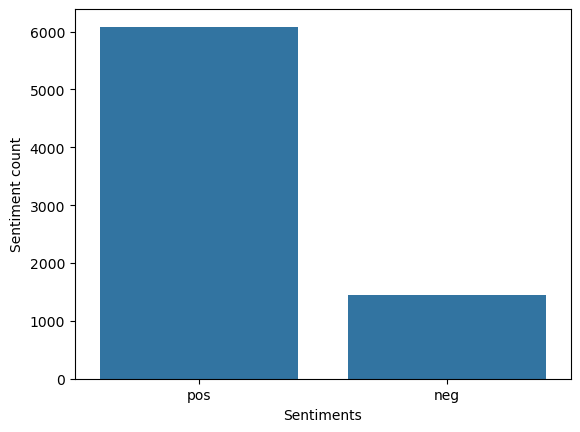

In [191]:
text_df_sorted = text_df.sort_values('nb_pred_b', ascending=False)
ax = sns.countplot(x ='nb_pred_b', data = text_df_sorted)
ax.set(ylabel='Sentiment count', xlabel='Sentiments')
plt.show()

Text(0.5, 1.0, 'Sentiment distribution NB and SMOTE Pie Chart')

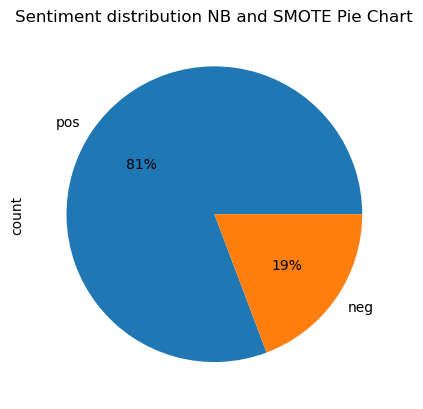

In [192]:
text_df_sorted['nb_pred_b'].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Sentiment distribution NB and SMOTE Pie Chart")

### 2.1.6 Display The Sentiment based on Brands

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice cream brand')]

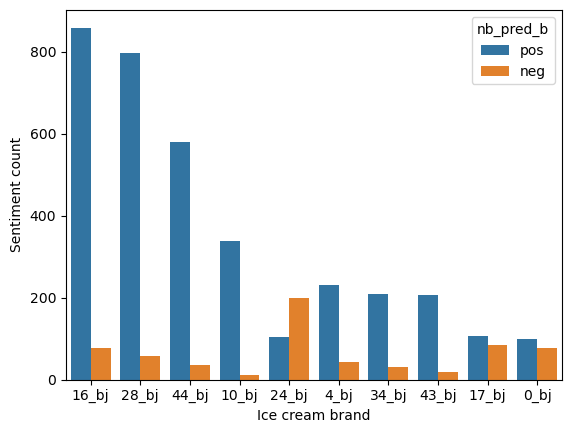

In [193]:
# Top 10 ice cream brand sort by number of reviews
df_prod_reviewcount = text_df_sorted['key'].value_counts().head(10)
df_prod_isin = text_df_sorted[text_df_sorted['key'].isin(df_prod_reviewcount.index)]
ax1 = sns.countplot(x='key', hue='nb_pred_b', data=df_prod_isin, order=df_prod_reviewcount.index)
ax1.set(ylabel='Sentiment count', xlabel='Ice cream brand')

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice Cream brand')]

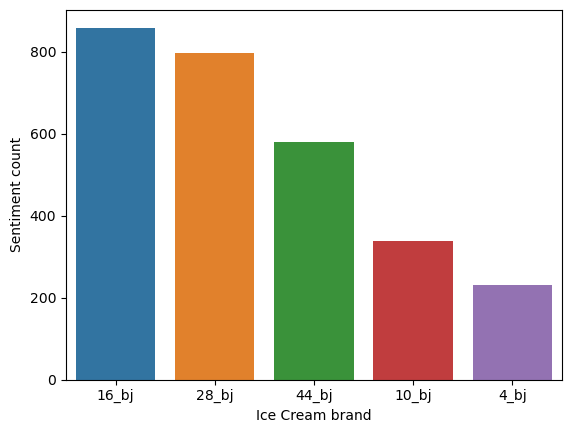

In [194]:
# Top 5 ice cream brand sort by positive review
df_posreview = text_df_sorted.loc[text_df_sorted['nb_pred_b'] == 'pos']
df_prod_positivecount = df_posreview['key'].value_counts().head(5).reset_index(name='count')
ax2 = sns.barplot(x='key', y='count', data=df_prod_positivecount, hue='key')
ax2.set(ylabel='Sentiment count', xlabel='Ice Cream brand')

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice Cream brand')]

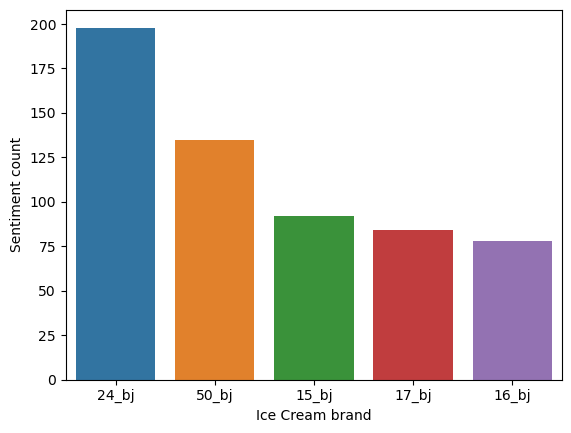

In [195]:
# Top 5 ice cream brand sort by negative review
df_negreview = text_df_sorted.loc[text_df_sorted['nb_pred_b'] == 'neg']
df_prod_negativecount = df_negreview['key'].value_counts().head(5).reset_index(name='count')
ax2 = sns.barplot(x='key', y='count', data=df_prod_negativecount, hue='key')
ax2.set(ylabel='Sentiment count', xlabel='Ice Cream brand')

## 2.2. Logistic Regression

### 2.2.1 Hyperparameter Search and Cross Validation

In [196]:
if PERFORM_HYPERPARAM_SEARCH:
    pipeline = Pipeline([
        ('tfidf', TfidfTransformer()),
        ('sampling', SMOTE(random_state=seed)),
        ('lr', LogisticRegression(random_state=seed))
    ])

    # Define the parameters to be tuned
    parameters = {
        'sampling__k_neighbors': np.arange(1, 101).tolist()
    }

    # Perform hyperparameter search
    hyper_param_search(pipeline, parameters, 'LR_SMOTE_HYPERPARAM.csv')

### 2.2.2 Display the Performance Metrics and Confusion Matrix of Validation Step

Training and Validation of LR SMOTE
Time: 0.09182071685791016 
Performance score:

LR SMOTE Model Accuracy: 0.9509283819628647
              precision    recall  f1-score   support

         0.0      0.772     0.913     0.837       104
         1.0      0.986     0.957     0.971       650

    accuracy                          0.951       754
   macro avg      0.879     0.935     0.904       754
weighted avg      0.956     0.951     0.953       754



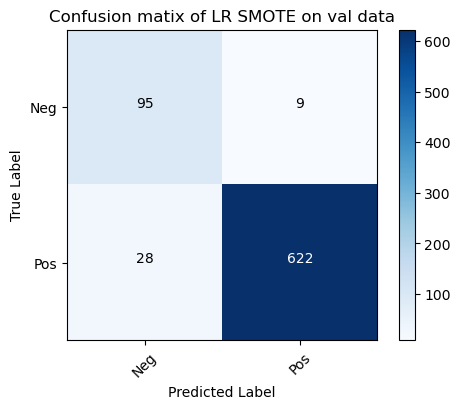

In [197]:
pipeline = Pipeline([
    ('tfidf', TfidfTransformer()),
    ('sampling', SMOTE(random_state=seed, k_neighbors=53)),
    ('lr', LogisticRegression(random_state=seed, 
                              solver='saga', 
                              tol=1.0))
])

lr_smote_model = train_val_baseline(pipeline, 'LR SMOTE')

### 2.2.3 Display the Performance Metrics and Confusion Matrix of Testing Step

Testing Baseline of LR SMOTE
Time: 0.0010714530944824219
LR SMOTE Model Accuracy: 0.9363395225464191 
Performance score:
              precision    recall  f1-score   support

         0.0      0.706     0.944     0.808       107
         1.0      0.990     0.935     0.962       647

    accuracy                          0.936       754
   macro avg      0.848     0.940     0.885       754
weighted avg      0.950     0.936     0.940       754



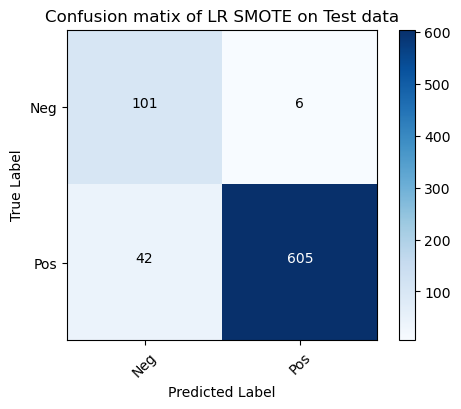

In [198]:
test_baseline(lr_smote_model, 'LR SMOTE')

### 2.2.4 Map The Prediction Labels to Class Labels

In [199]:
lr_predictions = lr_smote_model.predict(tf_token)

# Mapping prediction labels to class labels ("pos" and "neg")
label_map = {1: "pos", 0: "neg"}
lr_predicted_labels = [label_map[prediction] for prediction in lr_predictions]

# Adding the prediction column to the DataFrame
text_df['lr_pred_b'] = lr_predicted_labels

# Displaying the DataFrame with the prediction column
text_df


,key,product_name,stars,com_titletext,b_star,b_score,tokens_titletext,nb_pred,lr_pred,svm_pred,nb_pred_b,lr_pred_b
1,0_bj,Salted Caramel Core,5,I’m OBSESSED with this pint! I decided to try ...,1.0,0.9442,"[obsess, pint, decid, tri, although, not, huge...",pos,pos,pos,neg,neg
3,0_bj,Salted Caramel Core,5,Obsessed!!! Why are people complaining about t...,1.0,0.9270,"[obsess, peopl, complain, blond, browni, not, ...",pos,pos,pos,pos,pos
4,0_bj,Salted Caramel Core,1,Worst Ice Cream Ever! This ice cream is worst ...,0.0,-0.7210,"[worst, ice, cream, ever, ice, cream, worst, i...",neg,neg,neg,neg,neg
5,0_bj,Salted Caramel Core,2,Way Too Salty I bought this last night to go w...,0.0,-0.8834,"[way, salti, bought, last, night, go, louisian...",neg,neg,neg,neg,neg
8,0_bj,Salted Caramel Core,2,"Could be better. I LOVE caramel, so much so th...",0.0,0.9550,"[could, better, love, caramel, much, could, ea...",pos,neg,pos,neg,neg
...,...,...,...,...,...,...,...,...,...,...,...,...
7938,56_bj,Peanut Butter Fudge Core,5,Peanut butter fudge heaven Oh man I use to be ...,1.0,0.9049,"[peanut, butter, fudg, heaven, oh, man, use, w...",pos,pos,pos,pos,pos
7939,56_bj,Peanut Butter Fudge Core,5,The best Chocolate Ice Cream Combo This is the...,1.0,0.8070,"[best, chocol, ice, cream, combo, first, choco...",pos,pos,pos,pos,pos
7940,56_bj,Peanut Butter Fudge Core,5,PERFECT!! This is the best pint of ice cream I...,1.0,0.9552,"[perfect, best, pint, ice, cream, ever, like, ...",pos,pos,pos,pos,pos
7941,56_bj,Peanut Butter Fudge Core,5,My favorite! This is my favorite ice cream eve...,1.0,0.8350,"[favorit, favorit, ice, cream, ever, not, get,...",pos,pos,pos,pos,pos


In [200]:
text_df['lr_pred_b'].value_counts()

lr_pred_b
pos    6138
neg    1398
Name: count, dtype: int64

### 2.2.5 Display the Class Sentiment in Bar and Pie Charts

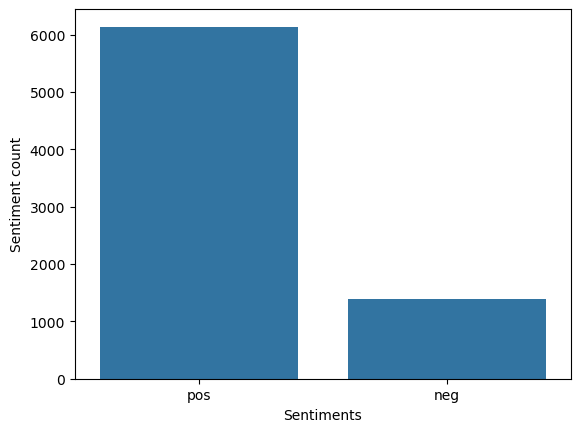

In [201]:
text_df_sorted = text_df.sort_values('lr_pred_b', ascending=False)
ax = sns.countplot(x ='lr_pred_b', data = text_df_sorted)
ax.set(ylabel='Sentiment count', xlabel='Sentiments')
plt.show()

Text(0.5, 1.0, 'Sentiment distribution LR and SMOTE Pie Chart')

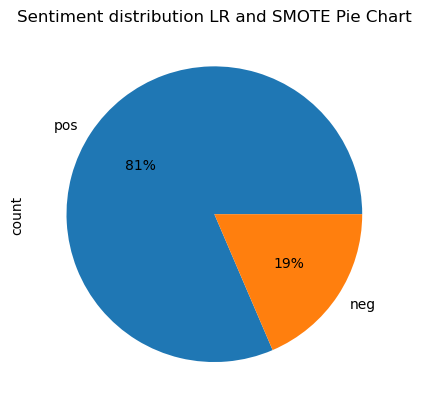

In [202]:
text_df_sorted['lr_pred_b'].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Sentiment distribution LR and SMOTE Pie Chart")

### 2.2.6 Display The Sentiment based on Brands

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice cream brand')]

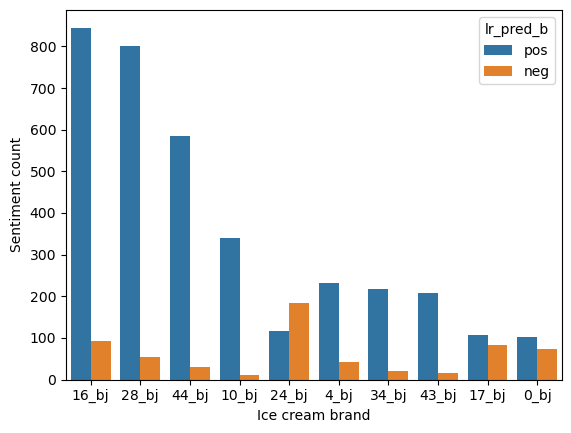

In [203]:
# Top 10 ice cream brand sort by number of reviews
df_prod_reviewcount = text_df_sorted['key'].value_counts().head(10)
df_prod_isin = text_df_sorted[text_df_sorted['key'].isin(df_prod_reviewcount.index)]
ax1 = sns.countplot(x='key', hue='lr_pred_b', data=df_prod_isin, order=df_prod_reviewcount.index)
ax1.set(ylabel='Sentiment count', xlabel='Ice cream brand')

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice Cream brand')]

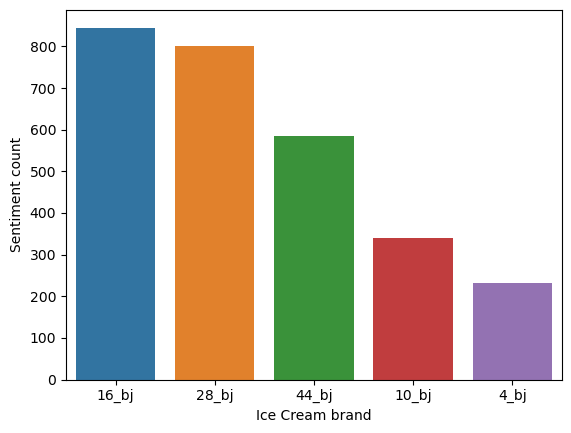

In [204]:
# Top 5 ice cream brand sort by positive review
df_posreview = text_df_sorted.loc[text_df_sorted['lr_pred_b'] == 'pos']
df_prod_positivecount = df_posreview['key'].value_counts().head(5).reset_index(name='count')
ax2 = sns.barplot(x='key', y='count', data=df_prod_positivecount, hue='key')
ax2.set(ylabel='Sentiment count', xlabel='Ice Cream brand')

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice Cream brand')]

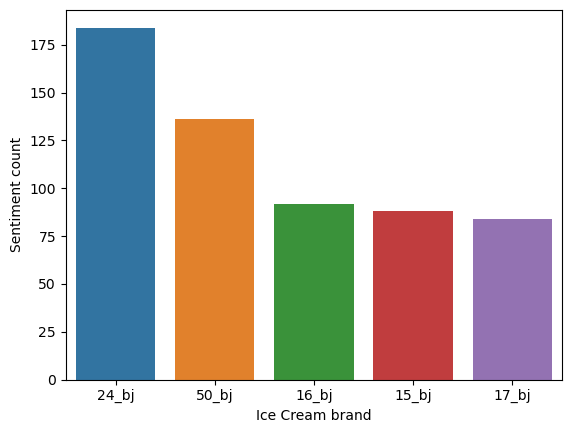

In [205]:
# Top 5 ice cream brand sort by negative review
df_negreview = text_df_sorted.loc[text_df_sorted['lr_pred_b'] == 'neg']
df_prod_negativecount = df_negreview['key'].value_counts().head(5).reset_index(name='count')
ax2 = sns.barplot(x='key', y='count', data=df_prod_negativecount, hue='key')
ax2.set(ylabel='Sentiment count', xlabel='Ice Cream brand')

## 2.3. Support Vector Machine

### 2.3.1 Hyperparameter Search and Cross Validation

In [206]:
if PERFORM_HYPERPARAM_SEARCH:
    pipeline = Pipeline([
        ('tfidf', TfidfTransformer()),
        ('sampling', SMOTE(random_state=seed)),
        ('svm', SVC(kernel='linear', random_state=seed, C=1))
    ])

    # Define the parameters to be tuned
    parameters = {
        'sampling__k_neighbors': np.arange(1, 101).tolist()
    }

    # Perform hyperparameter search
    hyper_param_search(pipeline, parameters, 'SVM_SMOTE_HYPERPARAM.csv')

### 2.2.2 Display the Performance Metrics and Confusion Matrix of Validation Step

Training and Validation of SVM SMOTE
Time: 4.4528281688690186 
Performance score:

SVM SMOTE Model Accuracy: 0.9602122015915119
              precision    recall  f1-score   support

         0.0      0.863     0.846     0.854       104
         1.0      0.975     0.978     0.977       650

    accuracy                          0.960       754
   macro avg      0.919     0.912     0.916       754
weighted avg      0.960     0.960     0.960       754



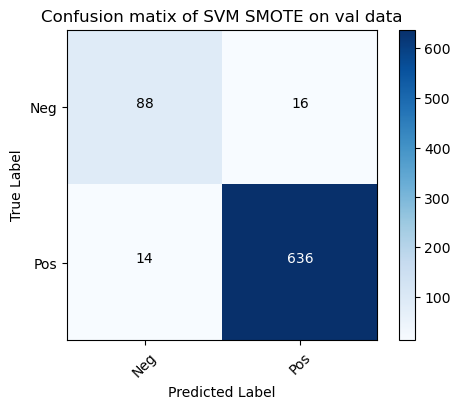

In [207]:
pipeline = Pipeline([
    ('tfidf', TfidfTransformer()),
    ('sampling', SMOTE(random_state=seed, k_neighbors=31)),
    ('svm', SVC(C=1, kernel='linear', random_state=seed))
])

svm_smote_model = train_val_baseline(pipeline, 'SVM SMOTE')

### 2.2.3 Display the Performance Metrics and Confusion Matrix of Testing Step

Testing Baseline of SVM SMOTE
Time: 0.21118998527526855
SVM SMOTE Model Accuracy: 0.9496021220159151 
Performance score:
              precision    recall  f1-score   support

         0.0      0.822     0.822     0.822       107
         1.0      0.971     0.971     0.971       647

    accuracy                          0.950       754
   macro avg      0.897     0.897     0.897       754
weighted avg      0.950     0.950     0.950       754



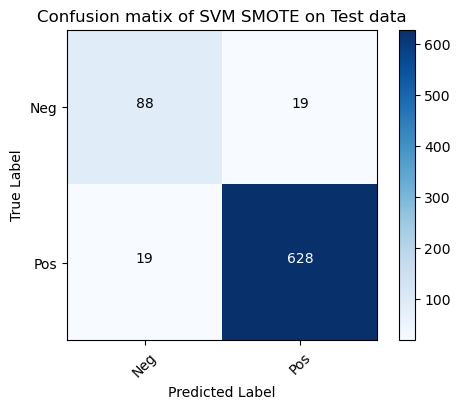

In [208]:
test_baseline(svm_smote_model, 'SVM SMOTE')

### 2.2.4 Map The Prediction Labels to Class Labels

In [209]:
svm_smote_predictions = svm_smote_model.predict(tf_token)

# Mapping prediction labels to class labels ("pos" and "neg")
label_map = {1: "pos", 0: "neg"}
svm_smote_predicted_labels = [label_map[prediction] for prediction in svm_smote_predictions]

# Adding the prediction column to the DataFrame
text_df['svm_pred_b'] = svm_smote_predicted_labels

# Displaying the DataFrame with the prediction column
text_df


,key,product_name,stars,com_titletext,b_star,b_score,tokens_titletext,nb_pred,lr_pred,svm_pred,nb_pred_b,lr_pred_b,svm_pred_b
1,0_bj,Salted Caramel Core,5,I’m OBSESSED with this pint! I decided to try ...,1.0,0.9442,"[obsess, pint, decid, tri, although, not, huge...",pos,pos,pos,neg,neg,neg
3,0_bj,Salted Caramel Core,5,Obsessed!!! Why are people complaining about t...,1.0,0.9270,"[obsess, peopl, complain, blond, browni, not, ...",pos,pos,pos,pos,pos,pos
4,0_bj,Salted Caramel Core,1,Worst Ice Cream Ever! This ice cream is worst ...,0.0,-0.7210,"[worst, ice, cream, ever, ice, cream, worst, i...",neg,neg,neg,neg,neg,neg
5,0_bj,Salted Caramel Core,2,Way Too Salty I bought this last night to go w...,0.0,-0.8834,"[way, salti, bought, last, night, go, louisian...",neg,neg,neg,neg,neg,neg
8,0_bj,Salted Caramel Core,2,"Could be better. I LOVE caramel, so much so th...",0.0,0.9550,"[could, better, love, caramel, much, could, ea...",pos,neg,pos,neg,neg,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7938,56_bj,Peanut Butter Fudge Core,5,Peanut butter fudge heaven Oh man I use to be ...,1.0,0.9049,"[peanut, butter, fudg, heaven, oh, man, use, w...",pos,pos,pos,pos,pos,pos
7939,56_bj,Peanut Butter Fudge Core,5,The best Chocolate Ice Cream Combo This is the...,1.0,0.8070,"[best, chocol, ice, cream, combo, first, choco...",pos,pos,pos,pos,pos,pos
7940,56_bj,Peanut Butter Fudge Core,5,PERFECT!! This is the best pint of ice cream I...,1.0,0.9552,"[perfect, best, pint, ice, cream, ever, like, ...",pos,pos,pos,pos,pos,pos
7941,56_bj,Peanut Butter Fudge Core,5,My favorite! This is my favorite ice cream eve...,1.0,0.8350,"[favorit, favorit, ice, cream, ever, not, get,...",pos,pos,pos,pos,pos,pos


In [210]:
text_df['svm_pred_b'].value_counts()

svm_pred_b
pos    6344
neg    1192
Name: count, dtype: int64

### 2.2.5 Display the Class Sentiment in Bar and Pie Charts

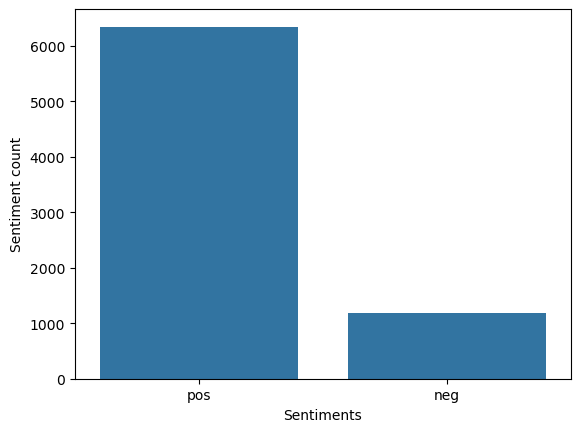

In [211]:
text_df_sorted = text_df.sort_values('svm_pred_b', ascending=False)
ax = sns.countplot(x ='svm_pred_b', data = text_df_sorted)
ax.set(ylabel='Sentiment count', xlabel='Sentiments')
plt.show()

Text(0.5, 1.0, 'Sentiment distribution SVM SMOTE Pie Chart')

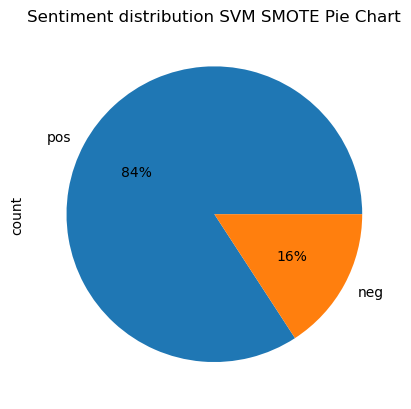

In [212]:
text_df_sorted['svm_pred_b'].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Sentiment distribution SVM SMOTE Pie Chart")

### 2.2.6 Display The Sentiment based on Brands

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice cream brand')]

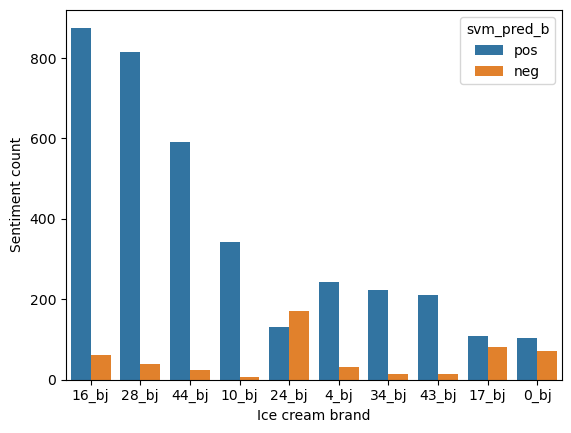

In [213]:
# Top 10 ice cream brand sort by number of reviews
df_prod_reviewcount = text_df_sorted['key'].value_counts().head(10)
df_prod_isin = text_df_sorted[text_df_sorted['key'].isin(df_prod_reviewcount.index)]
ax1 = sns.countplot(x='key', hue='svm_pred_b', data=df_prod_isin, order=df_prod_reviewcount.index)
ax1.set(ylabel='Sentiment count', xlabel='Ice cream brand')

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice Cream brand')]

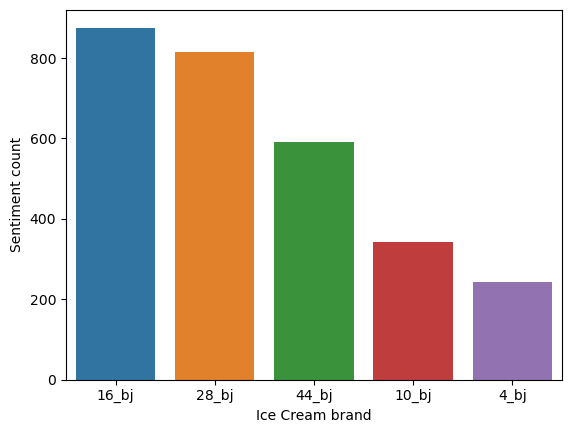

In [214]:
# Top 5 ice cream brand sort by positive review
df_posreview = text_df_sorted.loc[text_df_sorted['svm_pred_b'] == 'pos']
df_prod_positivecount = df_posreview['key'].value_counts().head(5).reset_index(name='count')
ax2 = sns.barplot(x='key', y='count', data=df_prod_positivecount, hue='key')
ax2.set(ylabel='Sentiment count', xlabel='Ice Cream brand')

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice Cream brand')]

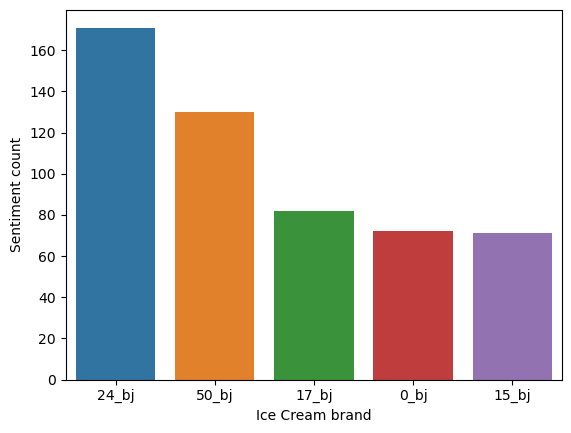

In [215]:
# Top 5 ice cream brand sort by negative review
df_negreview = text_df_sorted.loc[text_df_sorted['svm_pred_b'] == 'neg']
df_prod_negativecount = df_negreview['key'].value_counts().head(5).reset_index(name='count')
ax2 = sns.barplot(x='key', y='count', data=df_prod_negativecount, hue='key')
ax2.set(ylabel='Sentiment count', xlabel='Ice Cream brand')

# Plotting Logistic Regression, Naive Bayes, and Support Vector Machine

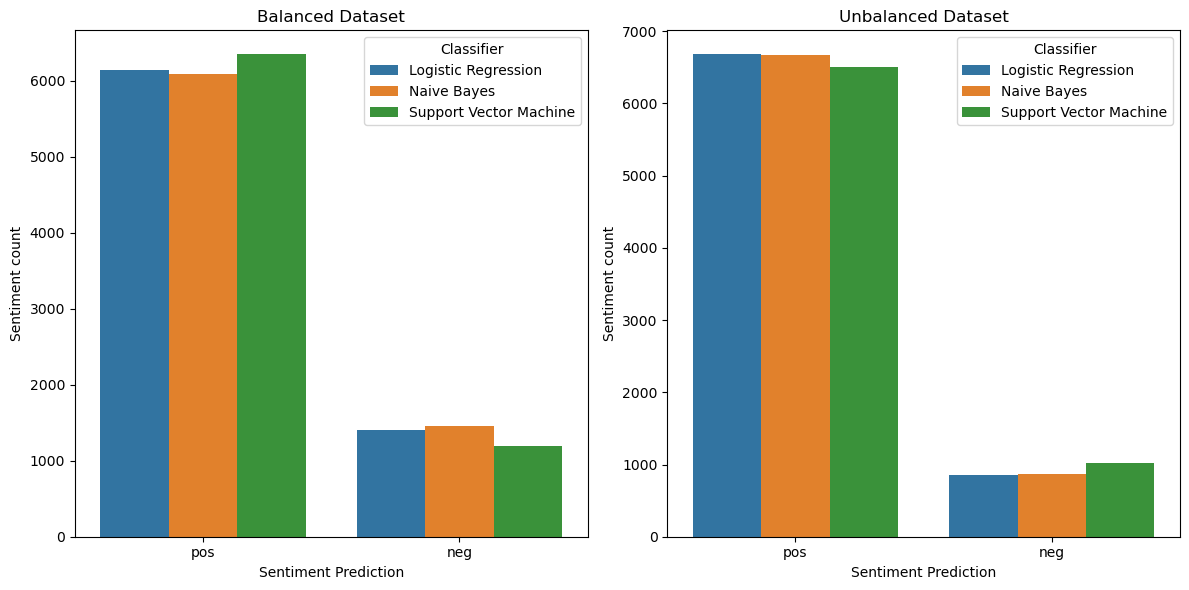

In [216]:
# Reshape the data for plotting
balanced_melted = pd.melt(text_df_sorted, value_vars=['lr_pred_b', 'nb_pred_b', 'svm_pred_b'],
                          var_name='Classifier', value_name='Sentiment')
unbalanced_melted = pd.melt(text_df_sorted, value_vars=['lr_pred', 'nb_pred', 'svm_pred'],
                            var_name='Classifier', value_name='Sentiment')

# Rename the classifier labels
balanced_melted['Classifier'] = balanced_melted['Classifier'].map({
    'lr_pred_b': 'Logistic Regression',
    'nb_pred_b': 'Naive Bayes',
    'svm_pred_b': 'Support Vector Machine'
})
unbalanced_melted['Classifier'] = unbalanced_melted['Classifier'].map({
    'lr_pred': 'Logistic Regression',
    'nb_pred': 'Naive Bayes',
    'svm_pred': 'Support Vector Machine'
})

# Plotting
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(1, 2, 1)
sns.countplot(x='Sentiment', hue='Classifier', data=balanced_melted, ax=ax1)
ax1.set_ylabel('Sentiment count')
ax1.set_xlabel('Sentiment Prediction')
ax1.set_title('Balanced Dataset')

ax2 = plt.subplot(1, 2, 2)
sns.countplot(x='Sentiment', hue='Classifier', data=unbalanced_melted, ax=ax2)
ax2.set_ylabel('Sentiment count')
ax2.set_xlabel('Sentiment Prediction')
ax2.set_title('Unbalanced Dataset')

plt.tight_layout()
plt.show()

In [217]:
balanced_melted['Classifier'].value_counts()

Classifier
Logistic Regression       7536
Naive Bayes               7536
Support Vector Machine    7536
Name: count, dtype: int64

In [218]:
unbalanced_melted['Classifier'].value_counts()

Classifier
Logistic Regression       7536
Naive Bayes               7536
Support Vector Machine    7536
Name: count, dtype: int64

# Plotting Logistic Regression, Naive Bayes, and Support Vector Machine

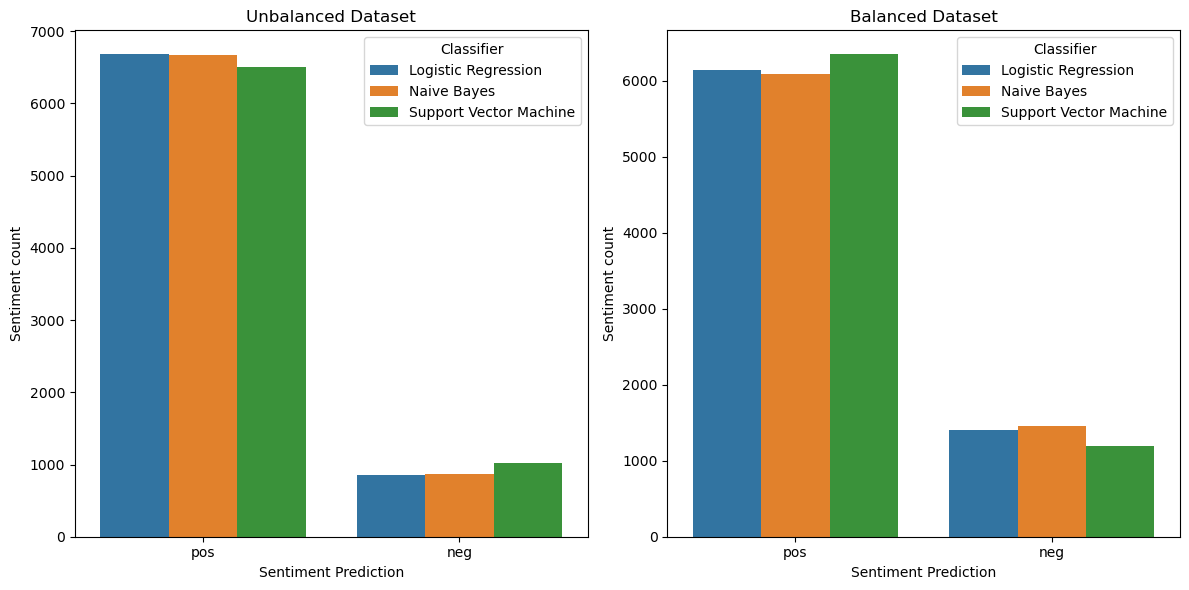

In [219]:
# Reshape the data for plotting
balanced_melted = pd.melt(text_df_sorted, value_vars=['lr_pred_b', 'nb_pred_b','svm_pred_b'],
                          var_name='Classifier', value_name='Sentiment')
unbalanced_melted = pd.melt(text_df_sorted, value_vars=['lr_pred', 'nb_pred', 'svm_pred'],
                            var_name='Classifier', value_name='Sentiment')

# Rename the classifier labels
balanced_melted['Classifier'] = balanced_melted['Classifier'].map({
    'lr_pred_b': 'Logistic Regression',
    'nb_pred_b': 'Naive Bayes',
    'svm_pred_b': 'Support Vector Machine'
})
unbalanced_melted['Classifier'] = unbalanced_melted['Classifier'].map({
    'lr_pred': 'Logistic Regression',
    'nb_pred': 'Naive Bayes',
    'svm_pred': 'Support Vector Machine'
})

# Plotting
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(1, 2, 2)
sns.countplot(x='Sentiment', hue='Classifier', data=balanced_melted, ax=ax1)
ax1.set_ylabel('Sentiment count')
ax1.set_xlabel('Sentiment Prediction')
ax1.set_title('Balanced Dataset')

ax2 = plt.subplot(1, 2, 1)
sns.countplot(x='Sentiment', hue='Classifier', data=unbalanced_melted, ax=ax2)
ax2.set_ylabel('Sentiment count')
ax2.set_xlabel('Sentiment Prediction')
ax2.set_title('Unbalanced Dataset')

plt.tight_layout()
plt.show()

In [220]:
balanced_melted['Classifier'].value_counts()

Classifier
Logistic Regression       7536
Naive Bayes               7536
Support Vector Machine    7536
Name: count, dtype: int64

In [221]:
unbalanced_melted['Classifier'].value_counts()

Classifier
Logistic Regression       7536
Naive Bayes               7536
Support Vector Machine    7536
Name: count, dtype: int64